In [1]:
import anndata
import scvelo as scv
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext rpy2.ipython

os.chdir('/home/cole/Documents/citeseq-code/')
print(os.getcwd())

/home/cole/Documents/citeseq-code


In [2]:
#naive = anndata.read_loom("./naive10xdata/naive10xdata/velocyto/naive10xdata.loom")
#p4 = anndata.read_loom("./p4hr10xdata/p4hr10xdata/velocyto/p4hr10xdata.loom") 
#mp4 = anndata.read_loom("./mp4hr10xdata/velocyto/mp4hr10xdata.loom") 
p24 = anndata.read_loom("./p24hr10xdata/p24hr10xdata/velocyto/p24hr10xdata.loom") 
mp24 = anndata.read_loom("./mp24hr10xdata/mp24hr10xdata/velocyto/mp24hr10xdata.loom") 

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
sample_obs = pd.read_csv("./cellID_obs.csv")
umap_cord = pd.read_csv("./cell_embeddings.csv")
cell_clusters = pd.read_csv("./clusters.csv")

In [4]:
cellID_obs_p24 = sample_obs[sample_obs['x'].str.contains("p24_")]
cellID_obs_mp24 = sample_obs[sample_obs['x'].str.contains("mp24_")]

# rename barcodes to match the loom files
cellID_obs_p24['x'] = cellID_obs_p24['x'].str.replace('p24_', 'p24hr10xdata:')
cellID_obs_p24['x'] = cellID_obs_p24['x'].str.replace('-1', 'x')
cellID_obs_mp24['x'] = cellID_obs_mp24['x'].str.replace('mp24_', 'mp24hr10xdata:')
cellID_obs_mp24['x'] = cellID_obs_mp24['x'].str.replace('-1', 'x')

#print(cellID_obs_p24['x'])
#print(cellID_obs_p24['x'].str.replace('p24_', 'p24hr10xdata:'))
#print(cellID_obs_p24['x'].str.replace('-1', 'x'))
#print(p24.obs.index)
#print(cellID_obs_p24)
#print(np.isin(p24.obs.index, cellID_obs_p24))

sample_p24 = p24[np.isin(p24.obs.index, cellID_obs_p24)]
print(all(np.isin(sample_p24.obs.index, cellID_obs_p24)))
sample_mp24 = mp24[np.isin(mp24.obs.index, cellID_obs_mp24)]
print(all(np.isin(sample_mp24.obs.index, cellID_obs_mp24)))


print(sample_p24)
print(sample_mp24)

True
True
View of AnnData object with n_obs × n_vars = 1314 × 32285
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
View of AnnData object with n_obs × n_vars = 2765 × 32285
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'


In [5]:
sample_p24_index = pd.DataFrame(sample_p24.obs.index)
print(sample_p24_index)
sample_p24_index = sample_p24_index.rename(columns = {'CellID':'Cell ID'})
print(sample_p24_index)

sample_mp24_index = pd.DataFrame(sample_mp24.obs.index)
print(sample_p24_index)
sample_mp24_index = sample_mp24_index.rename(columns = {'CellID':'Cell ID'})
print(sample_mp24_index)

                              CellID
0     p24hr10xdata:AACAAAGTCTAGGCATx
1     p24hr10xdata:AACCATGGTATCTCTTx
2     p24hr10xdata:AAATGGAAGGCCTTCGx
3     p24hr10xdata:AACCTGAAGCTACTACx
4     p24hr10xdata:AACCCAATCGCTGTCTx
...                              ...
1309  p24hr10xdata:TTTAGTCCAACACAGGx
1310  p24hr10xdata:TTTCGATCACGTGAGAx
1311  p24hr10xdata:TTTAGTCCATAAGCGGx
1312  p24hr10xdata:TTTAGTCTCAACGAGGx
1313  p24hr10xdata:TTTCCTCCAGAAGCGTx

[1314 rows x 1 columns]
                             Cell ID
0     p24hr10xdata:AACAAAGTCTAGGCATx
1     p24hr10xdata:AACCATGGTATCTCTTx
2     p24hr10xdata:AAATGGAAGGCCTTCGx
3     p24hr10xdata:AACCTGAAGCTACTACx
4     p24hr10xdata:AACCCAATCGCTGTCTx
...                              ...
1309  p24hr10xdata:TTTAGTCCAACACAGGx
1310  p24hr10xdata:TTTCGATCACGTGAGAx
1311  p24hr10xdata:TTTAGTCCATAAGCGGx
1312  p24hr10xdata:TTTAGTCTCAACGAGGx
1313  p24hr10xdata:TTTCCTCCAGAAGCGTx

[1314 rows x 1 columns]
                             Cell ID
0     p24hr10xdata:AACAAA

In [6]:
# rename barcodes in umap file as well
umap_cord = umap_cord.rename(columns = {'Unnamed: 0':'Cell ID'})
umap_cord['Cell ID'] = umap_cord['Cell ID'].str.replace('_', 'hr10xdata:')
umap_cord['Cell ID'] = umap_cord['Cell ID'].str.replace('-1', 'x')

# rename umap coordinates
umap_cord = umap_cord.rename(columns = {'sctumapunint_1':'UMAP_1'})
umap_cord = umap_cord.rename(columns = {'sctumapunint_2':'UMAP_2'})

print(umap_cord)

                               Cell ID    UMAP_1     UMAP_2
0     naivehr10xdata:AAATGGACAACTAGAAx  1.619668  -9.306133
1     naivehr10xdata:AAATGGACAGTCGAGAx  1.620270  -8.987767
2     naivehr10xdata:AACACACAGACTTGTCx  1.665239  -9.443574
3     naivehr10xdata:AACCACAGTGAATTGAx  0.208100 -10.708314
4     naivehr10xdata:AACGTCAAGCTGGAGTx  1.540388  -9.063702
...                                ...       ...        ...
6478   mp24hr10xdata:TTTGGTTCACTCCTTGx  3.143757  -5.934874
6479   mp24hr10xdata:TTTGGTTCAGAGGACTx  0.257846  -4.948008
6480   mp24hr10xdata:TTTGGTTTCATGAGGGx -2.685752  -4.847570
6481   mp24hr10xdata:TTTGTTGAGGTGCGATx -0.190202  -6.779560
6482   mp24hr10xdata:TTTGTTGTCCGTGGGTx -1.655216  -2.190894

[6483 rows x 3 columns]


In [7]:
umap_ordered_p24 = sample_p24_index.merge(umap_cord, on = "Cell ID")
print(umap_ordered_p24)

umap_ordered_mp24 = sample_mp24_index.merge(umap_cord, on = "Cell ID")
print(umap_ordered_mp24)

                             Cell ID    UMAP_1    UMAP_2
0     p24hr10xdata:AACAAAGTCTAGGCATx -1.010322 -5.899992
1     p24hr10xdata:AACCATGGTATCTCTTx -2.012529 -4.528429
2     p24hr10xdata:AAATGGAAGGCCTTCGx -1.383099 -5.444809
3     p24hr10xdata:AACCTGAAGCTACTACx -1.471460 -5.848483
4     p24hr10xdata:AACCCAATCGCTGTCTx -1.708980 -3.408875
...                              ...       ...       ...
1309  p24hr10xdata:TTTAGTCCAACACAGGx -0.919237 -5.531658
1310  p24hr10xdata:TTTCGATCACGTGAGAx -0.438380 -5.921735
1311  p24hr10xdata:TTTAGTCCATAAGCGGx -1.726302 -5.300009
1312  p24hr10xdata:TTTAGTCTCAACGAGGx  2.231630 -5.712450
1313  p24hr10xdata:TTTCCTCCAGAAGCGTx -1.055038 -5.900937

[1314 rows x 3 columns]
                              Cell ID    UMAP_1    UMAP_2
0     mp24hr10xdata:AAAGTGACAAGAATACx -2.686161 -3.978869
1     mp24hr10xdata:AACACACTCGCGTGACx -2.147975 -2.897876
2     mp24hr10xdata:AAAGAACCAGTTGGTTx -1.291476 -5.207505
3     mp24hr10xdata:AAAGGATCACCGGAAAx -2.299533 -4.151616
4

In [8]:
umap_ordered_p24 = umap_ordered_p24.iloc[:,1:]
sample_p24.obsm['X_umap'] = umap_ordered_p24.values

umap_ordered_mp24 = umap_ordered_mp24.iloc[:,1:]
sample_mp24.obsm['X_umap'] = umap_ordered_mp24.values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


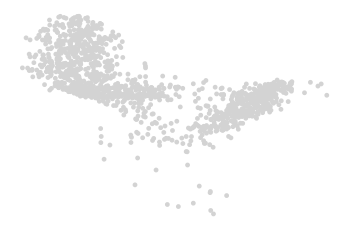

... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


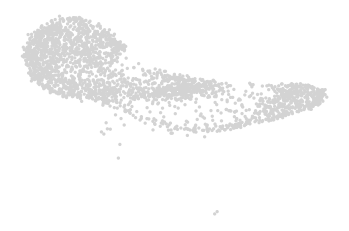

In [9]:
import scanpy as sc
sc.pl.umap(sample_p24, frameon=False, save=True)
sc.pl.umap(sample_mp24, frameon=False, save=True)

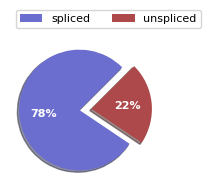

In [10]:
scv.pl.proportions(sample_p24)

In [11]:
scv.pp.filter_and_normalize(sample_p24, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(sample_p24, n_pcs=30, n_neighbors=30)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 30354 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [13]:
scv.tl.recover_dynamics(sample_p24, n_jobs = 10)

recovering dynamics (using 10/12 cores)


  0%|          | 0/863 [00:00<?, ?gene/s]

    finished (0:00:22) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [14]:
scv.tl.velocity(sample_p24, mode = 'dynamical')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [15]:
scv.tl.velocity_graph(sample_p24)

computing velocity graph (using 1/12 cores)


  0%|          | 0/1314 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


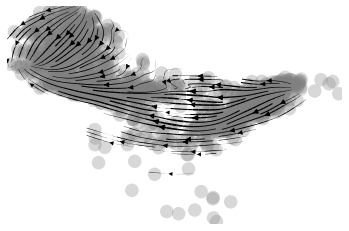

In [16]:
scv.pl.velocity_embedding_stream(sample_p24, basis='umap')

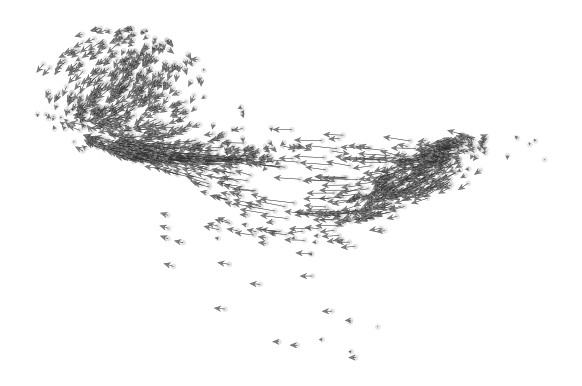

In [17]:
scv.pl.velocity_embedding(sample_p24, arrow_length=3, arrow_size=2, dpi=120)

In [18]:
scv.tl.rank_velocity_genes(sample_p24, min_corr=.3)

df = scv.DataFrame(sample_p24.uns['rank_velocity_genes']['names'])
df.head()

computing velocity clusters
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
    finished (0:00:00) --> added 
    'velocity_clusters', clusters based on louvain modularity on velocity vector field (adata.obs)
ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,0,1,2,3,4,5,6,7,8,9,10,11
0,Srgn,Smap2,Gm20406,Mcl1,Marcks,Actr3,Tgif1,Atp6v1a,Tnfaip2,Mfsd14b,Klra17,Tspan13
1,Ptafr,Slc16a3,Ago2,Sgpl1,Ctsb,Ripk1,Pnkp,Lrrfip2,Wfdc17,Bhlhe40,H3f3b,Stk24
2,Zc3h12a,Gsr,Akap13,Basp1,Basp1,Klra17,Gbp3,Smad3,Ifi214,Ninj1,Ripk1,Sec24a
3,Smim3,Smad3,Atp6v1c1,Ralgds,Ralgds,Gch1,Cd300c2,Gns,Plaur,Ctsb,Sell,Arpc3
4,H3f3a,Mreg,Slc38a1,Clic1,Sqstm1,Wbp1l,Zc3h12a,Atp6v1c1,Ptpn6,Ralgds,Actb,Il1f9


computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


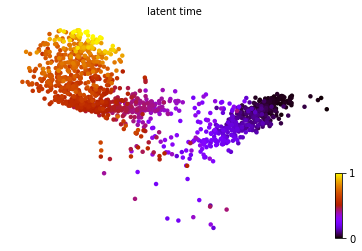

In [21]:
scv.tl.latent_time(sample_p24)
scv.pl.scatter(sample_p24, color='latent_time', color_map='gnuplot', size=80)

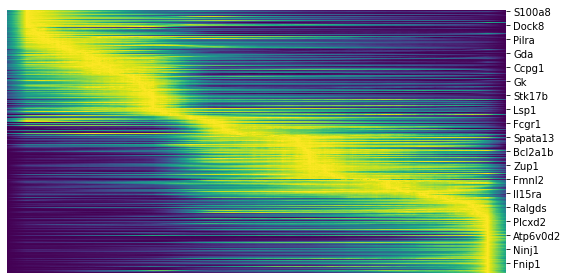

In [23]:
top_genes = sample_p24.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(sample_p24, var_names=top_genes, sortby='latent_time', n_convolve=100)


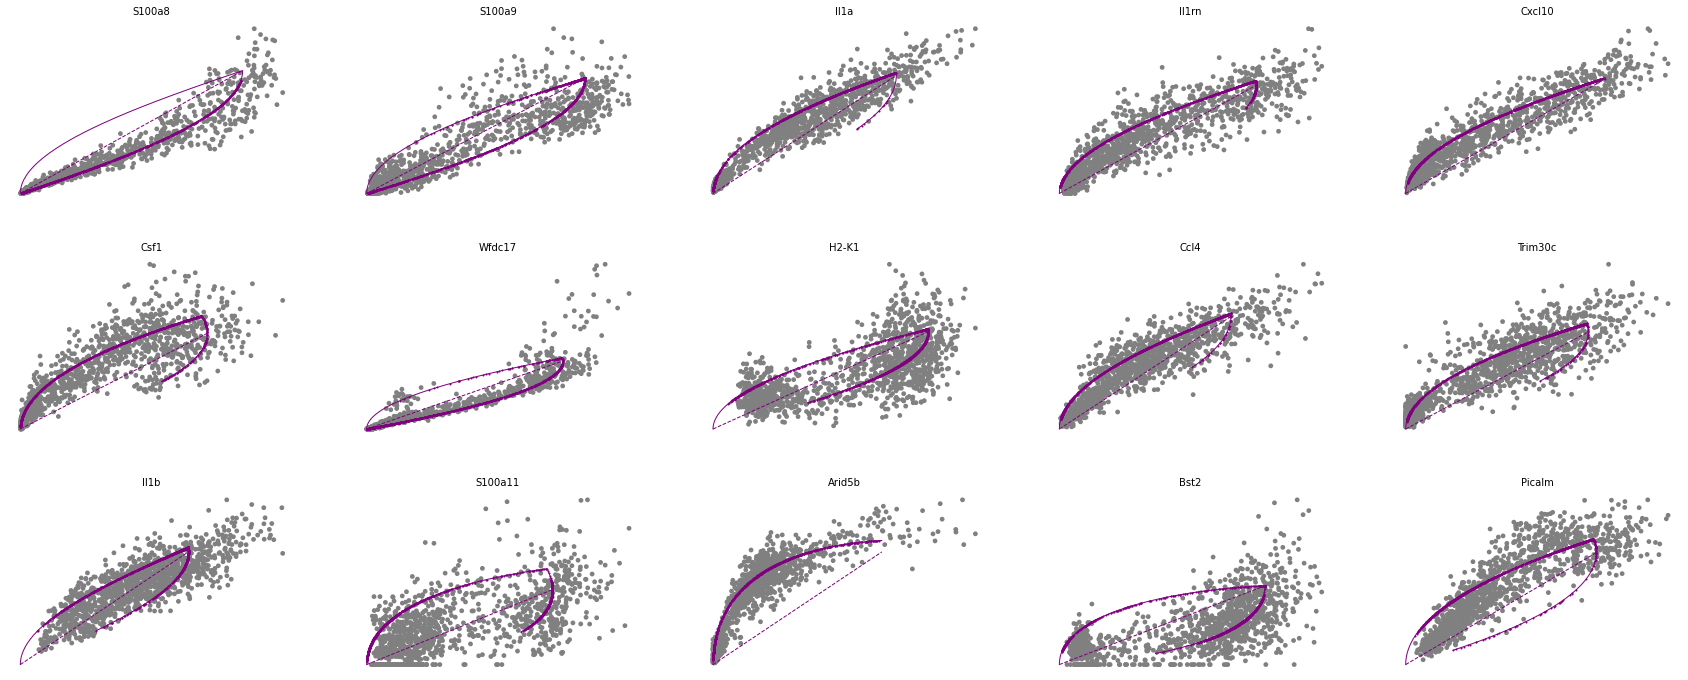

In [24]:
top_genes = sample_p24.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(sample_p24, basis=top_genes[:15], ncols=5, frameon=False)